<a href="https://colab.research.google.com/github/xxpaulo-victorxx/Agricultural-Raw-Material-prices/blob/main/Agricultural_Raw_Material_prices_(1990_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pré-processamento dos dados

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/agricultural_raw_material.csv")

In [ ]:
df.info
df.isnull().sum()

In [ ]:
# Replacing "%"", "," and "-"

df = df.replace('%','', regex=True)
df = df.replace(',','', regex=True)
df = df.replace('-','', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

# Dropping rows with NaN values
df = df.dropna()

# Check to see if all NaN values are resolved
df.isnull().sum()

# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change","Cotton Price","Cotton price % Change","Fine wool Price","Fine wool price % Change","Hard log Price","Hard log price % Change","Hard sawnwood Price","Hard sawnwood price % Change","Hide Price","Hide price % change","Plywood Price","Plywood price % Change","Rubber Price","Rubber price % Change","Softlog Price","Softlog price % Change","Soft sawnwood Price","Soft sawnwood price % Change","Wood pulp Price","Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

In [ ]:
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)

# Indexing Month
df = df.set_index('Month')

In [ ]:
df.head()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#Esse comando serve para plotar os gráficos estáticos logo abaixo da célula (Por padrão, desde a versão 3.7 do python anaconda, a configuração padrão do %matplotlib já é o inline).
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


##Heat Map (Mapa de Calor)


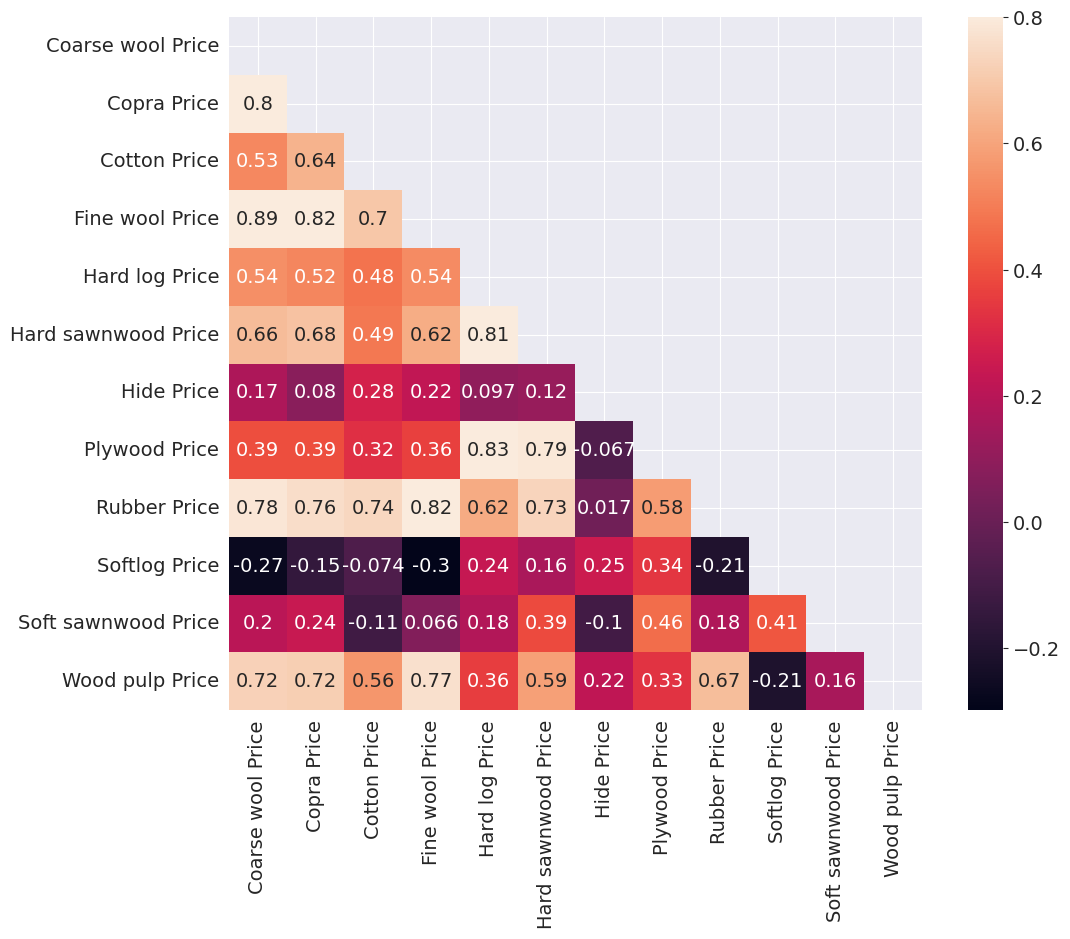

In [ ]:
# With percentage of variation (%):
# raw_data = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change","Cotton Price","Cotton price % Change","Fine wool Price","Fine wool price % Change","Hard log Price","Hard log price % Change","Hard sawnwood Price","Hard sawnwood price % Change","Hide Price","Hide price % change","Plywood Price","Plywood price % Change","Rubber Price","Rubber price % Change","Softlog Price","Softlog price % Change","Soft sawnwood Price","Soft sawnwood price % Change","Wood pulp Price","Wood pulp price % Change"]

# Without percentage of variation (%):
raw_data = ["Coarse wool Price", "Copra Price", "Cotton Price","Fine wool Price","Hard log Price","Hard sawnwood Price","Hide Price","Plywood Price","Rubber Price","Softlog Price","Soft sawnwood Price","Wood pulp Price"]

#Correlation Matrix:
corrmat = df[raw_data].corr()

#Setting the size of the plot:
fig = plt.figure(figsize = (12,9))

mask = np.triu(np.ones_like(corrmat, dtype = bool))
sns.heatmap(corrmat, vmax = .8, mask=mask, square=True, annot=True)
plt.show()

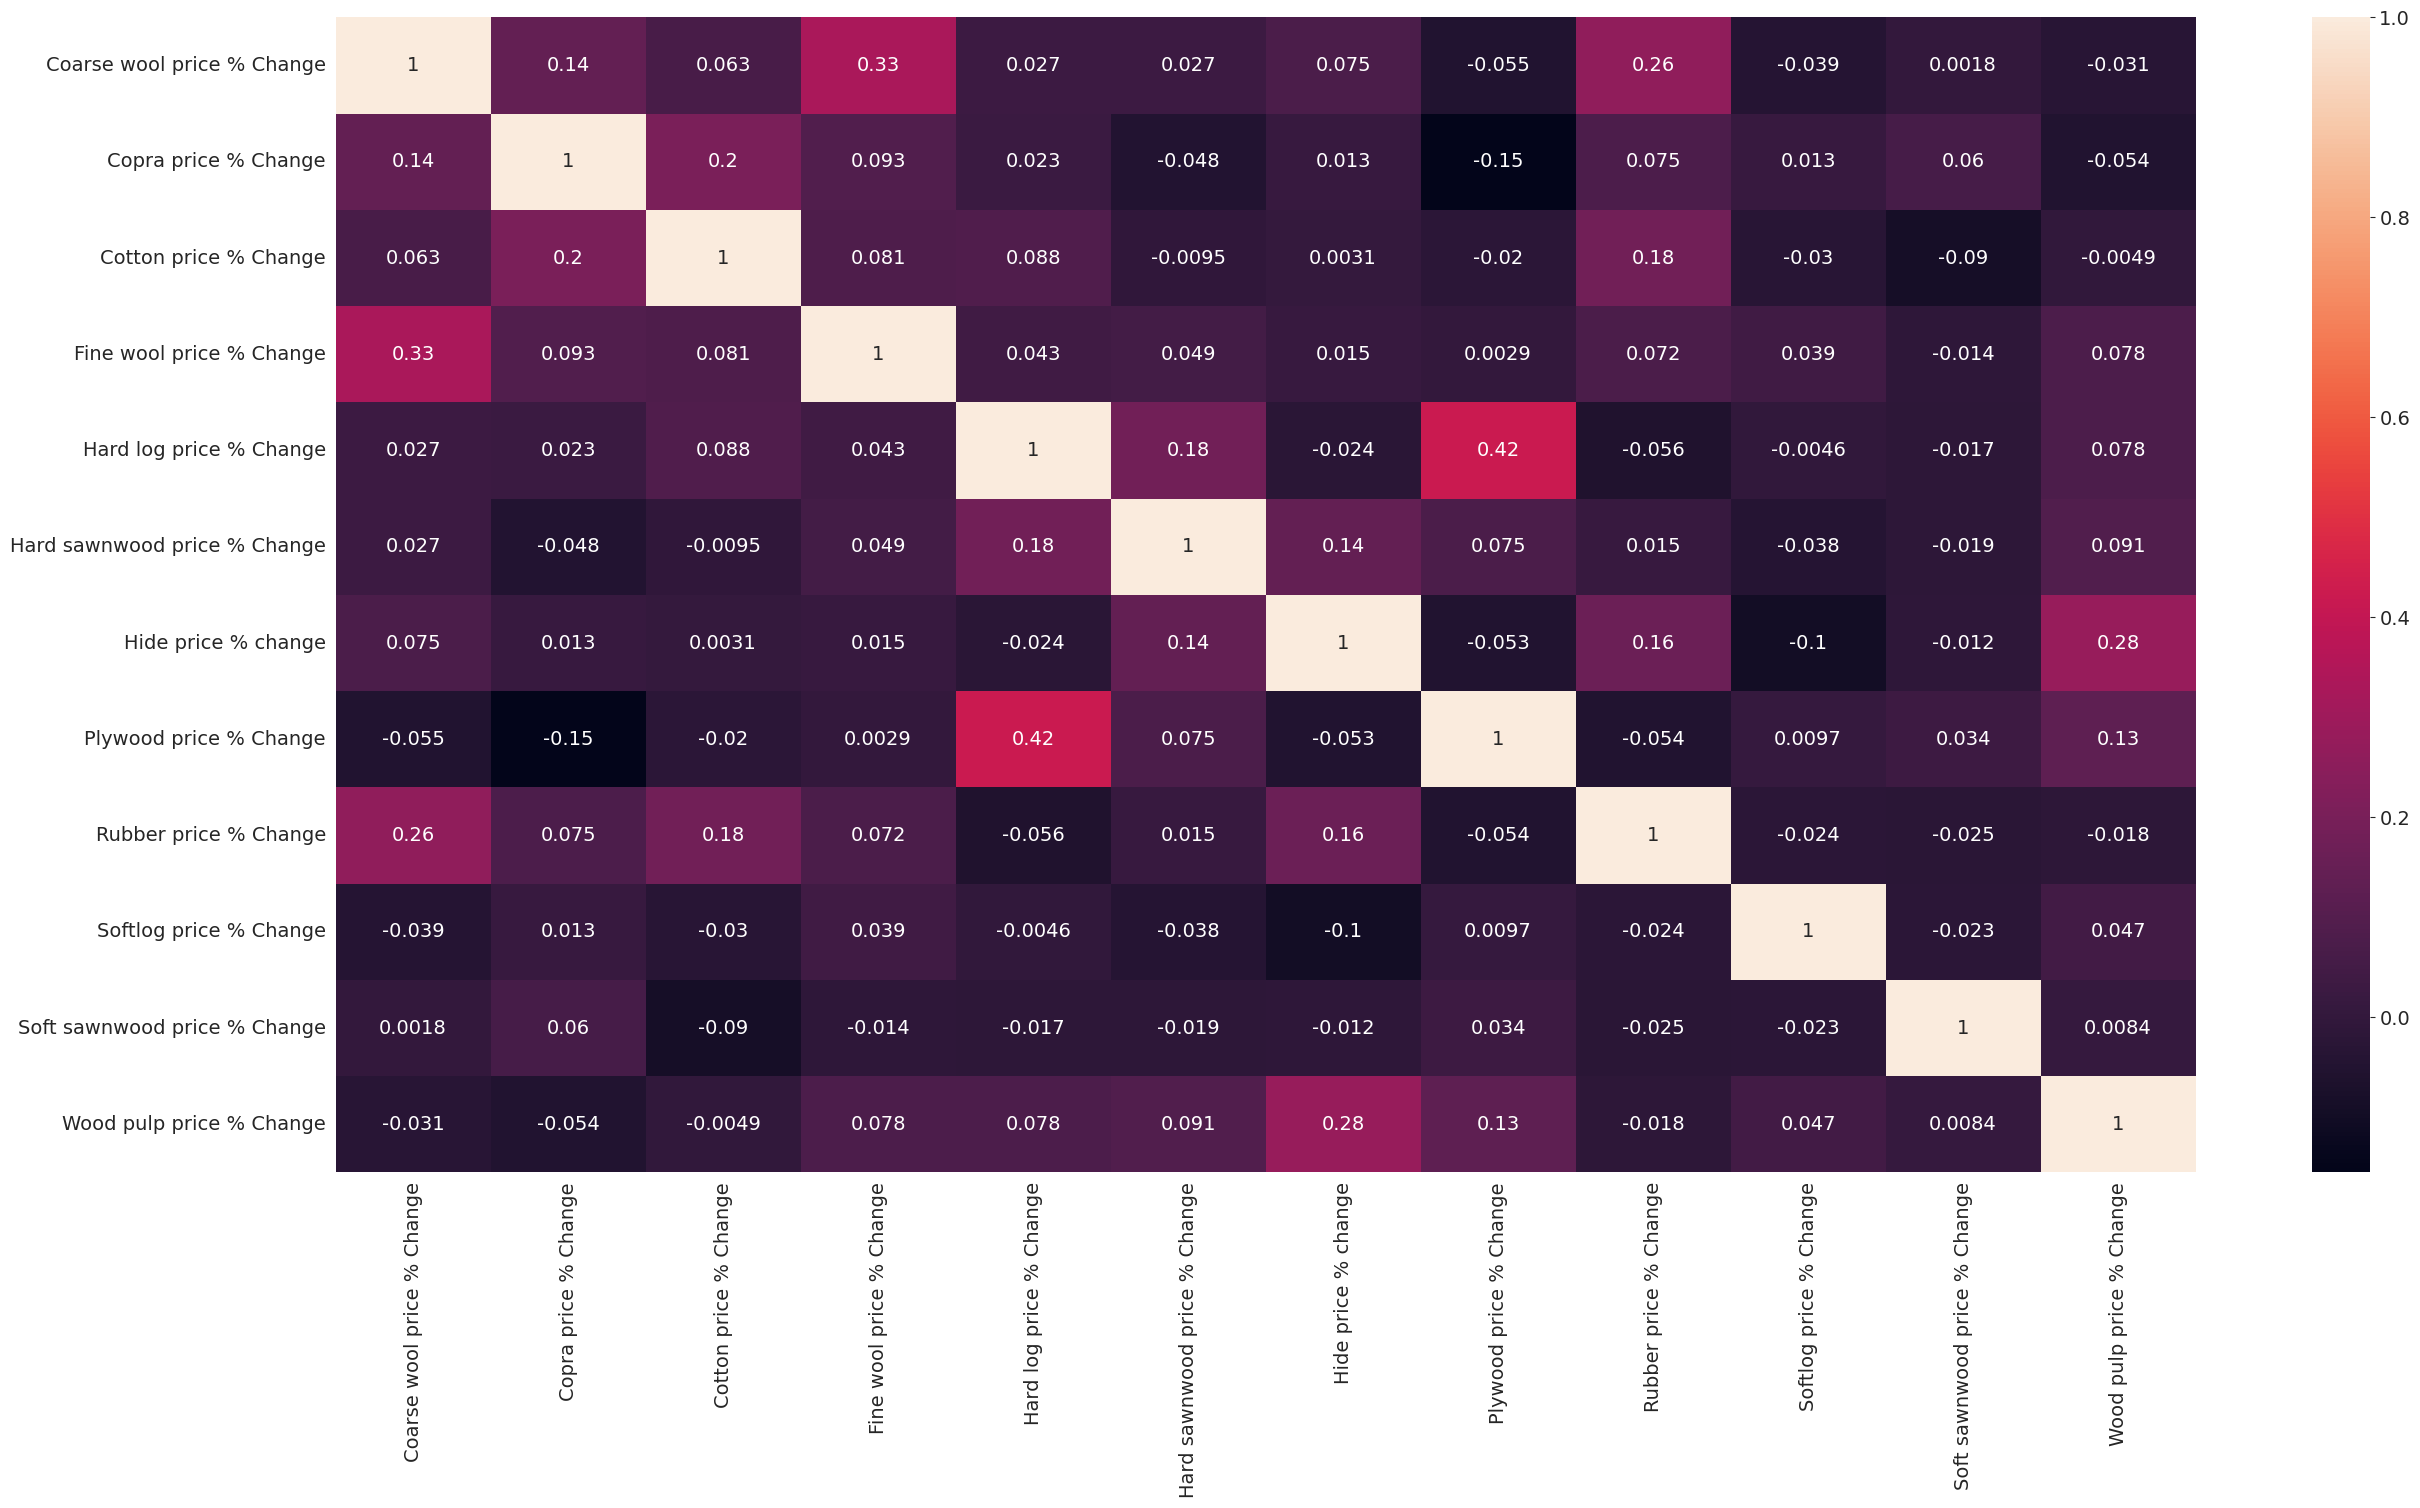

In [ ]:
plt.figure(figsize=(30,15))
changeList = ["Coarse wool price % Change", "Copra price % Change","Cotton price % Change","Fine wool price % Change","Hard log price % Change","Hard sawnwood price % Change","Hide price % change","Plywood price % Change","Rubber price % Change","Softlog price % Change","Soft sawnwood price % Change","Wood pulp price % Change"]

# Generate Correlation Matrix of Change % list:
corrMatrix = df[changeList].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Observações

---


A partir deste gráfico podemos concluir que praticamente não há relação entre a variação percentual dos preços das matérias primas:

*   O valor negativo implica que duas variáveis estão negativamente correlacionadas (inversamente proporcionais)
*   O valor zero implica nenhuma relação
*   Caso contrário, sendo maior o valor, maior será a chance de relação, preços e seus gráficos de % de mudança





##Coarse Wool (Lã Grossa):

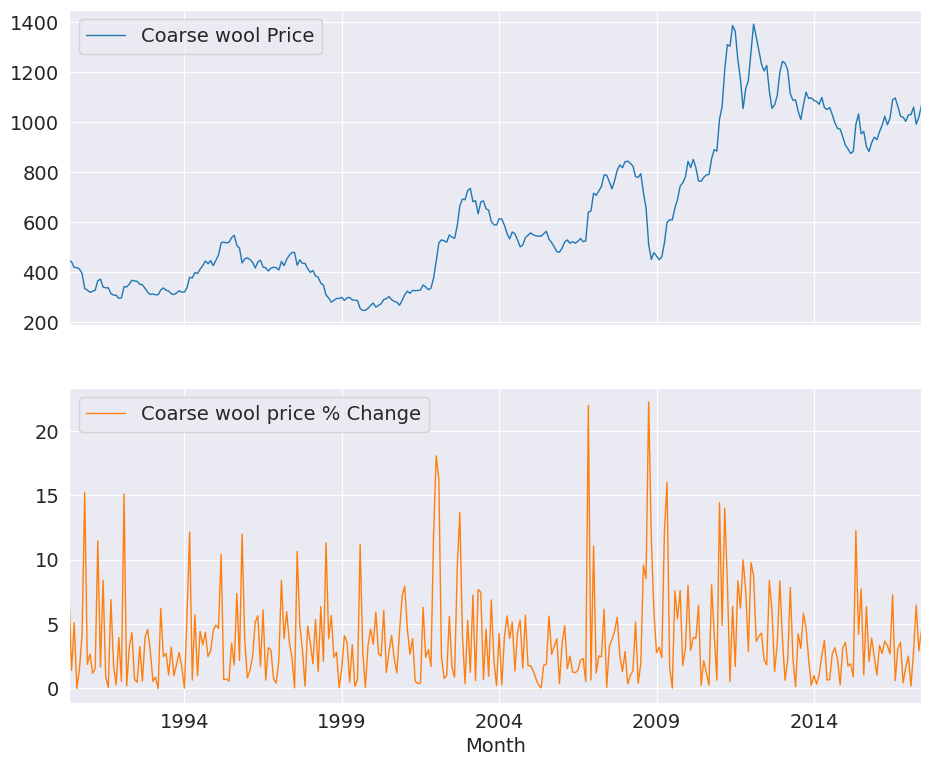

In [ ]:
axes = df[["Coarse wool Price","Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

## Descobrindo a variação normal do preço de cada matéria prima:


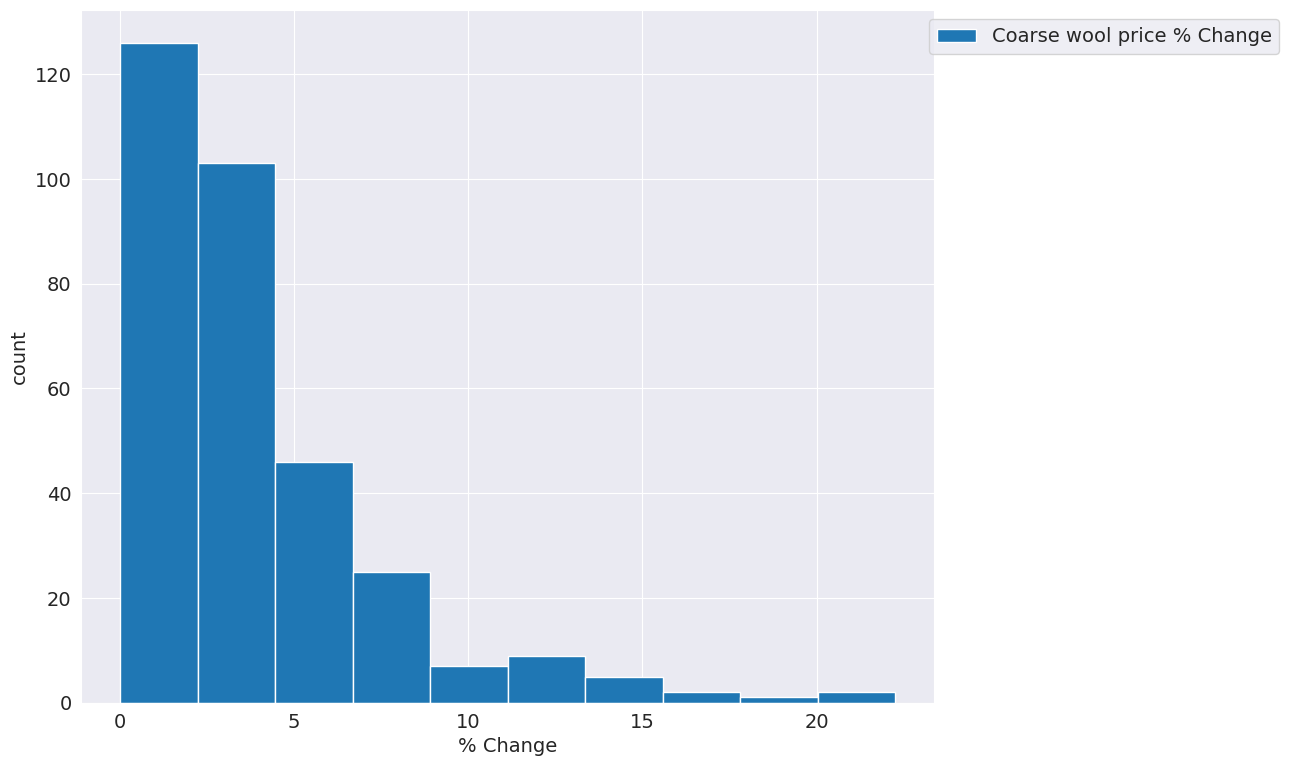

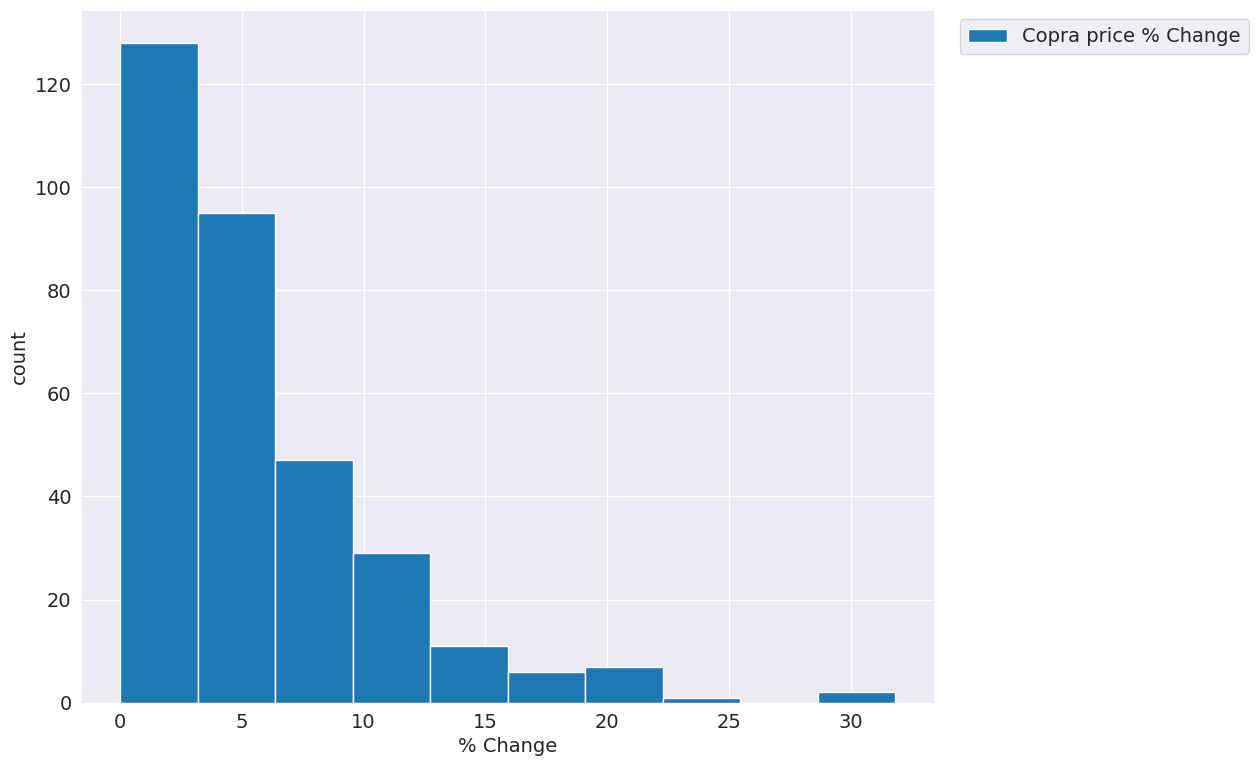

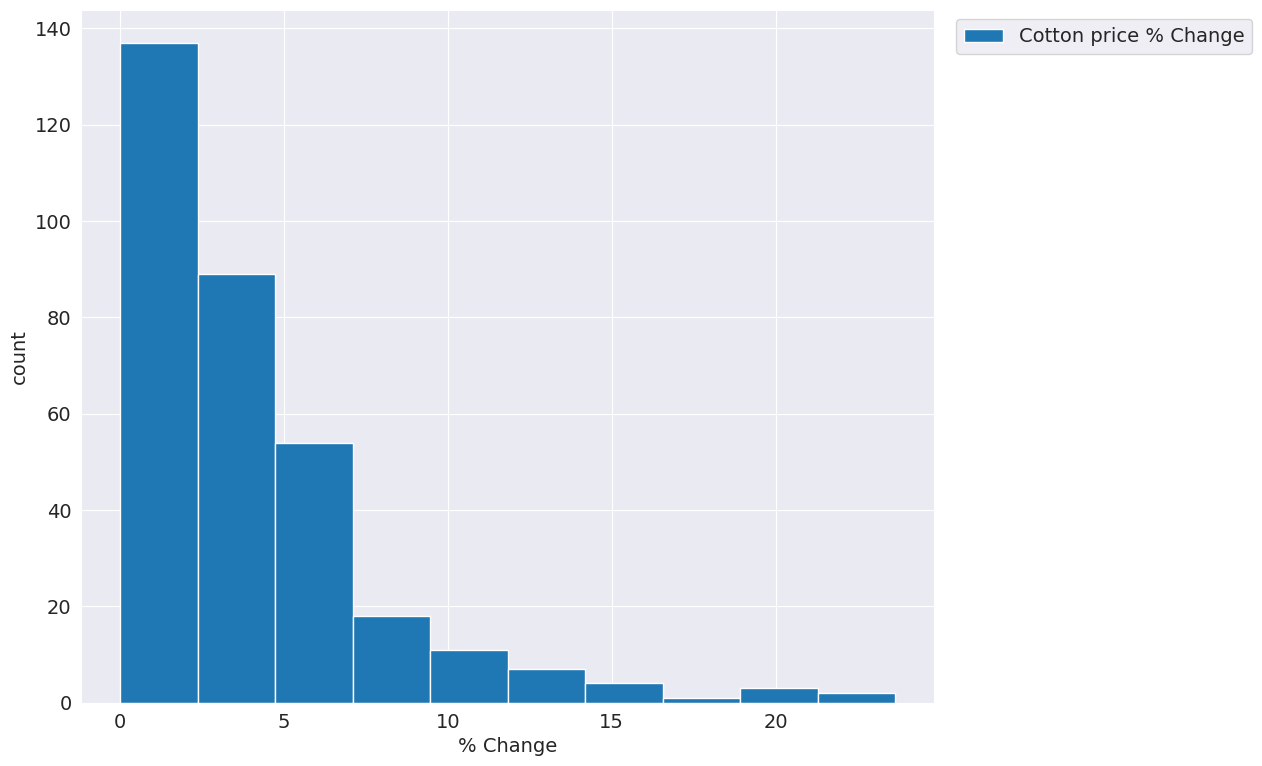

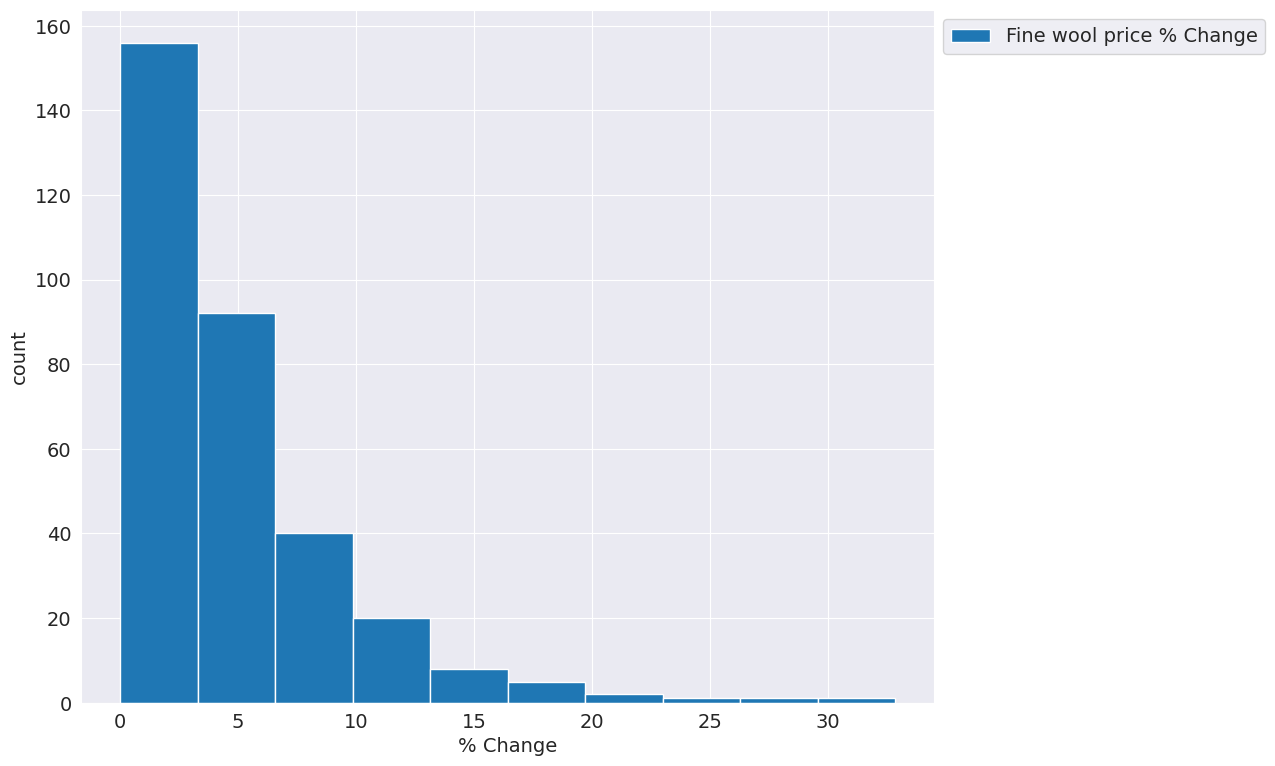

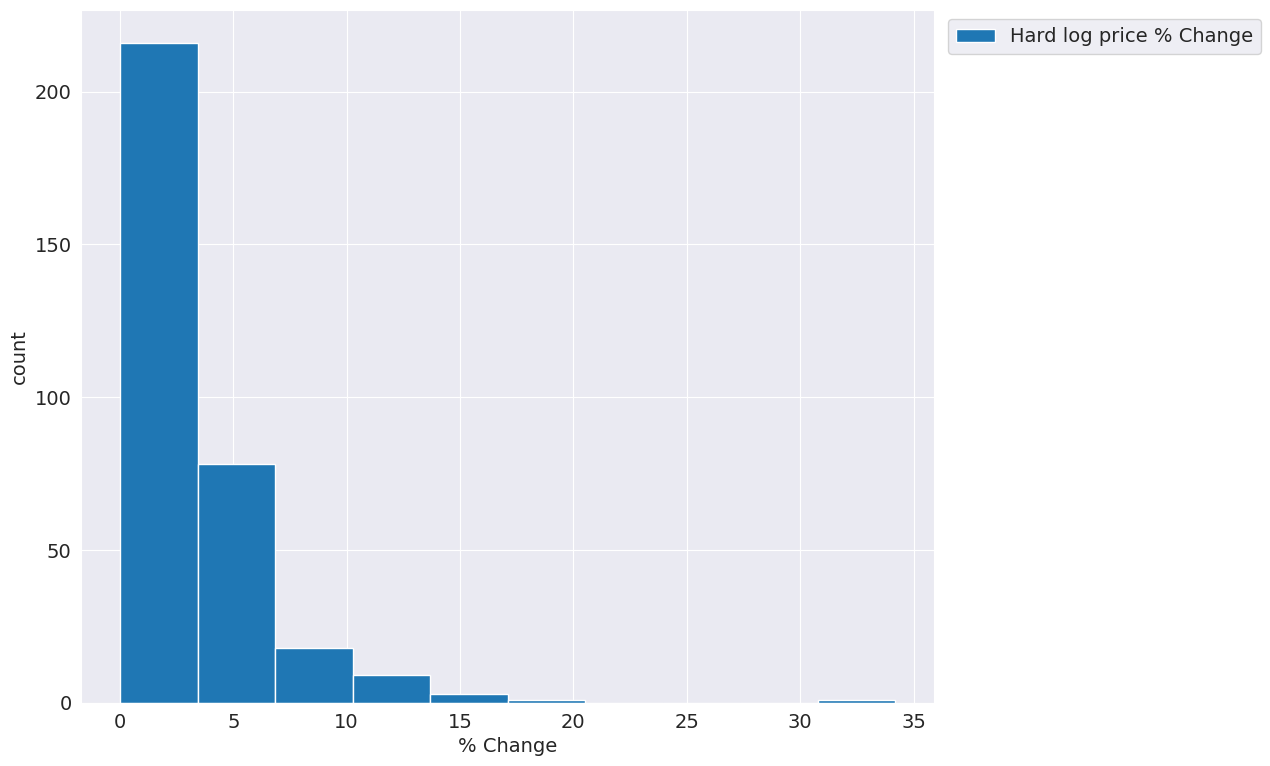

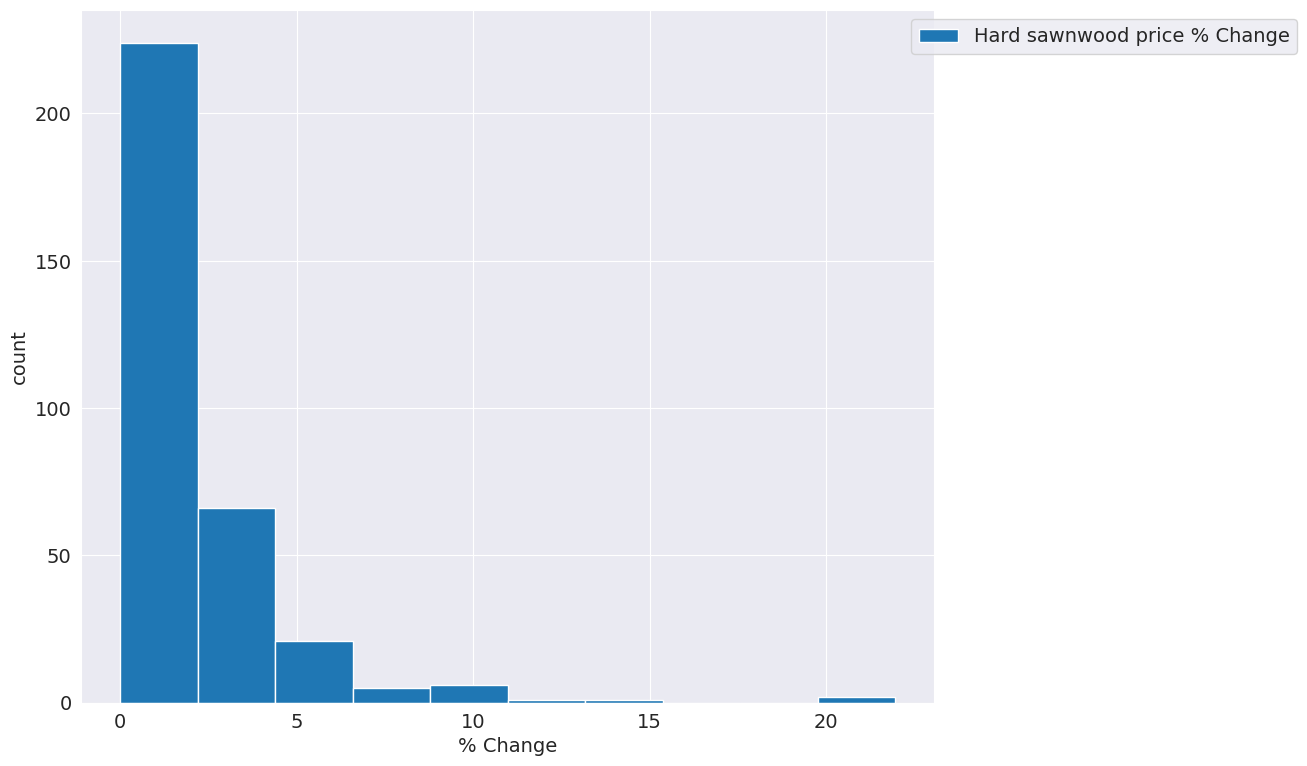

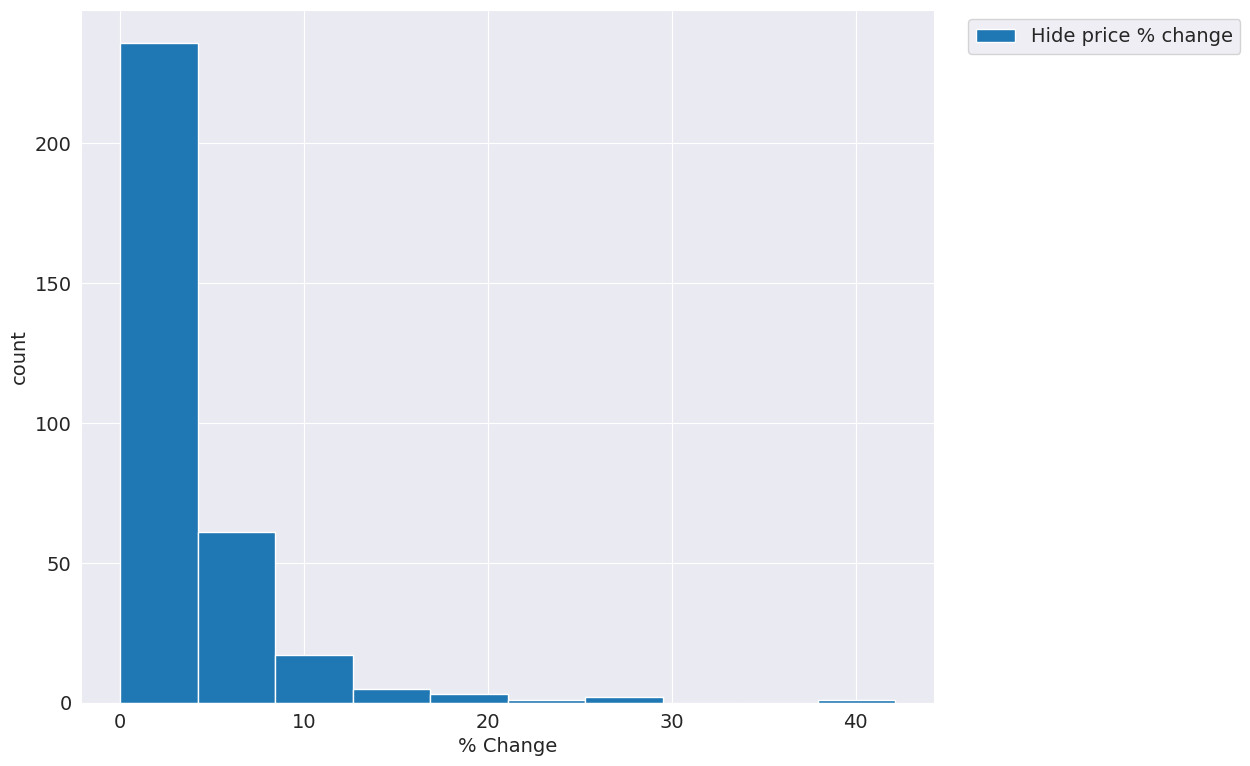

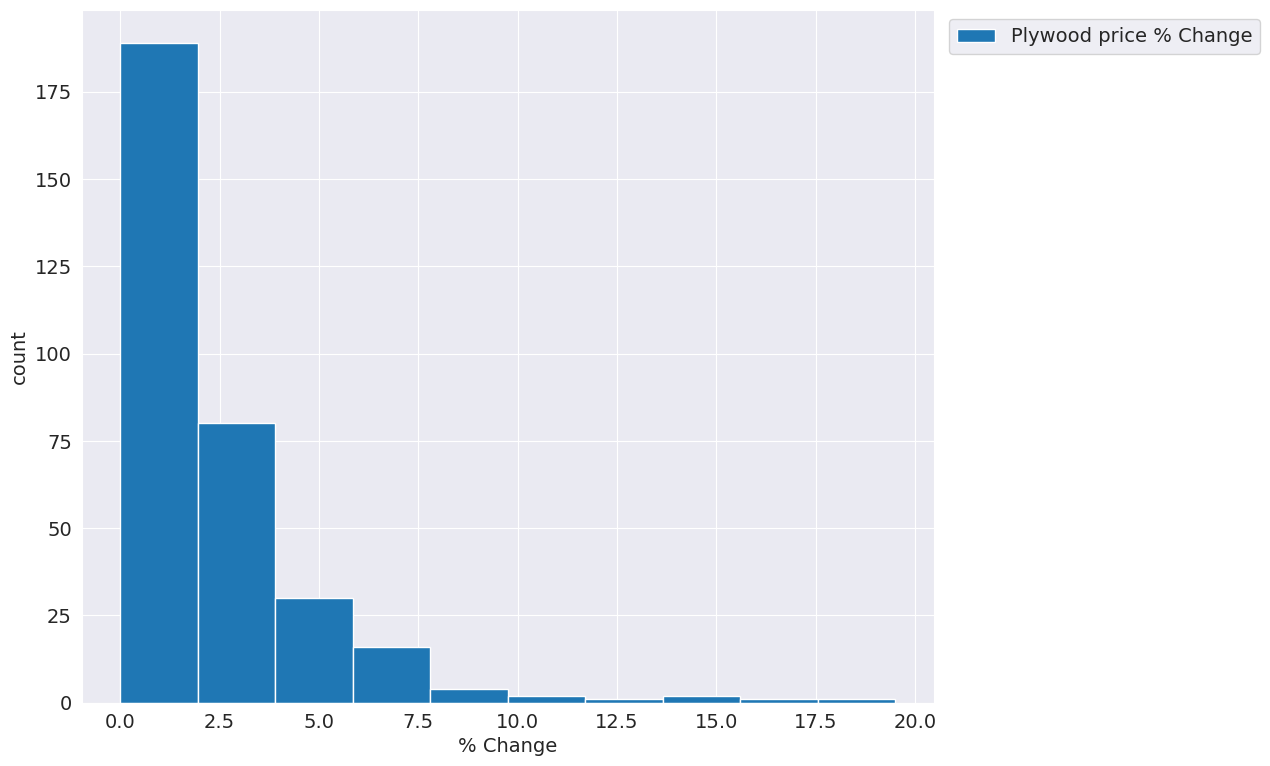

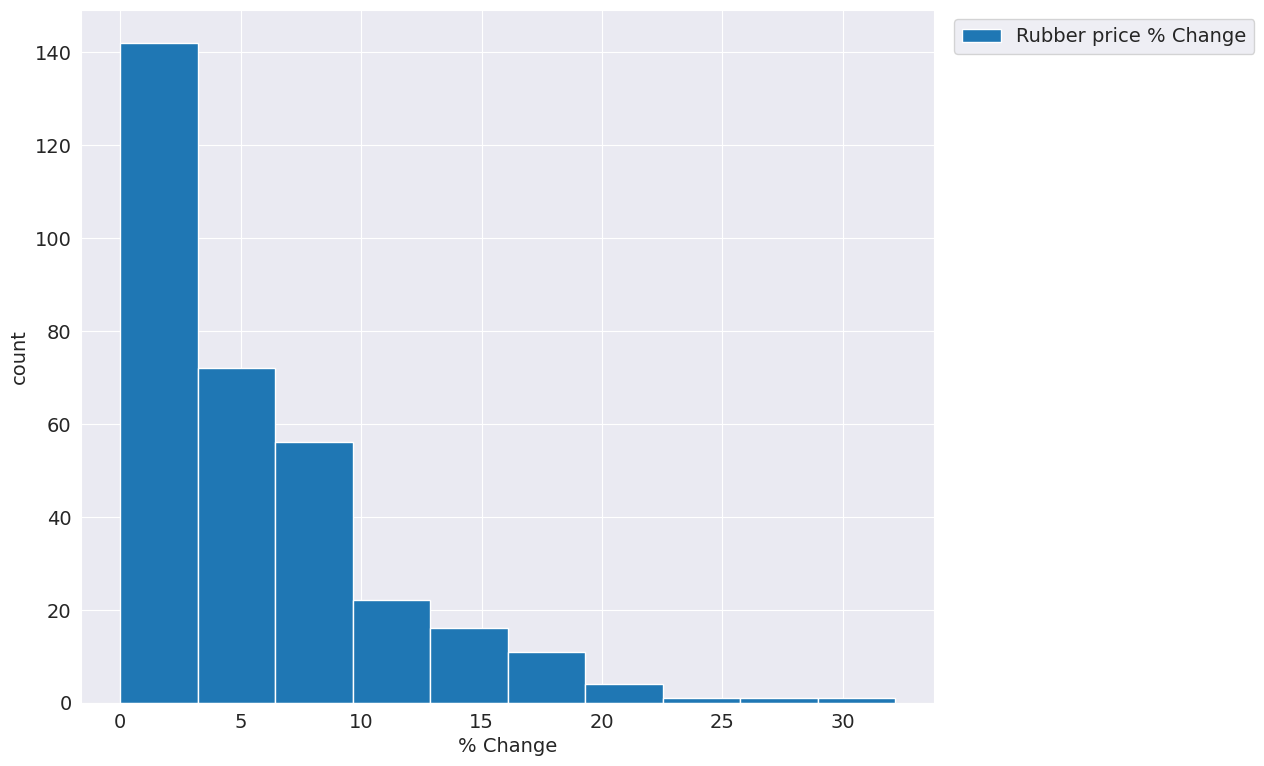

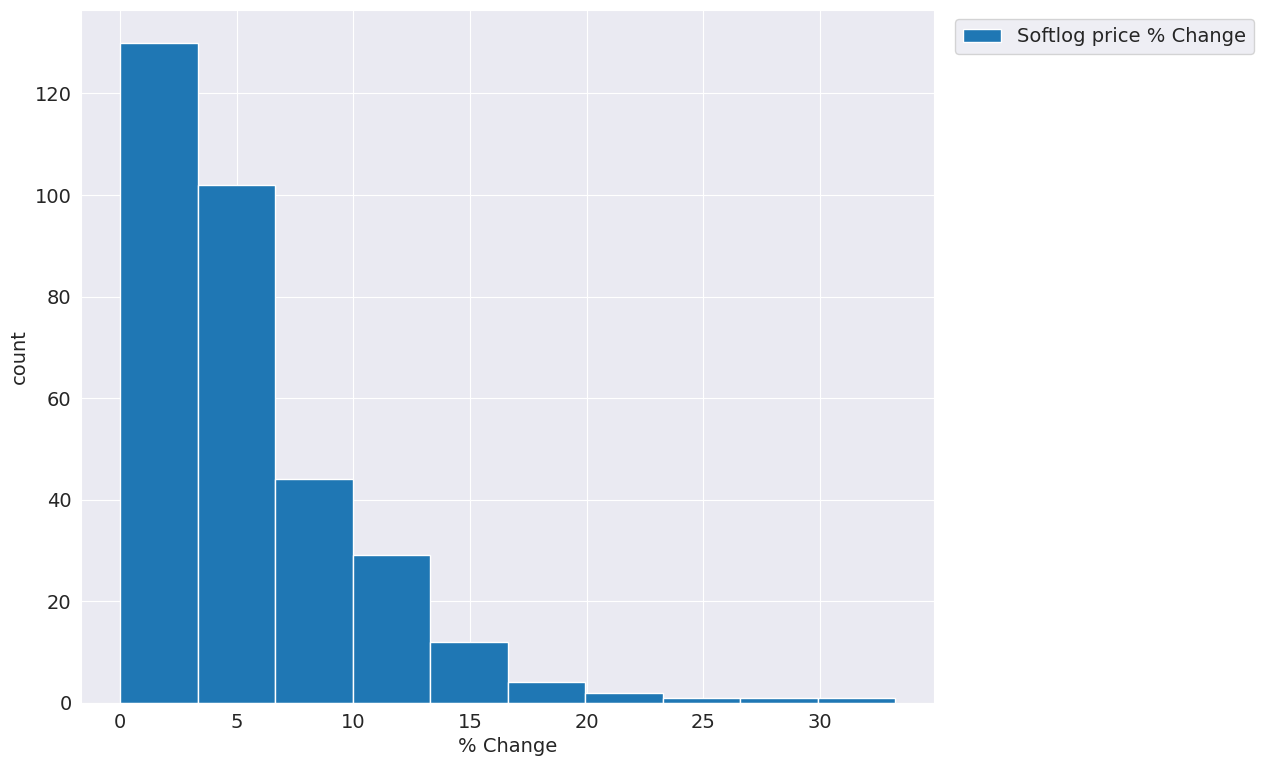

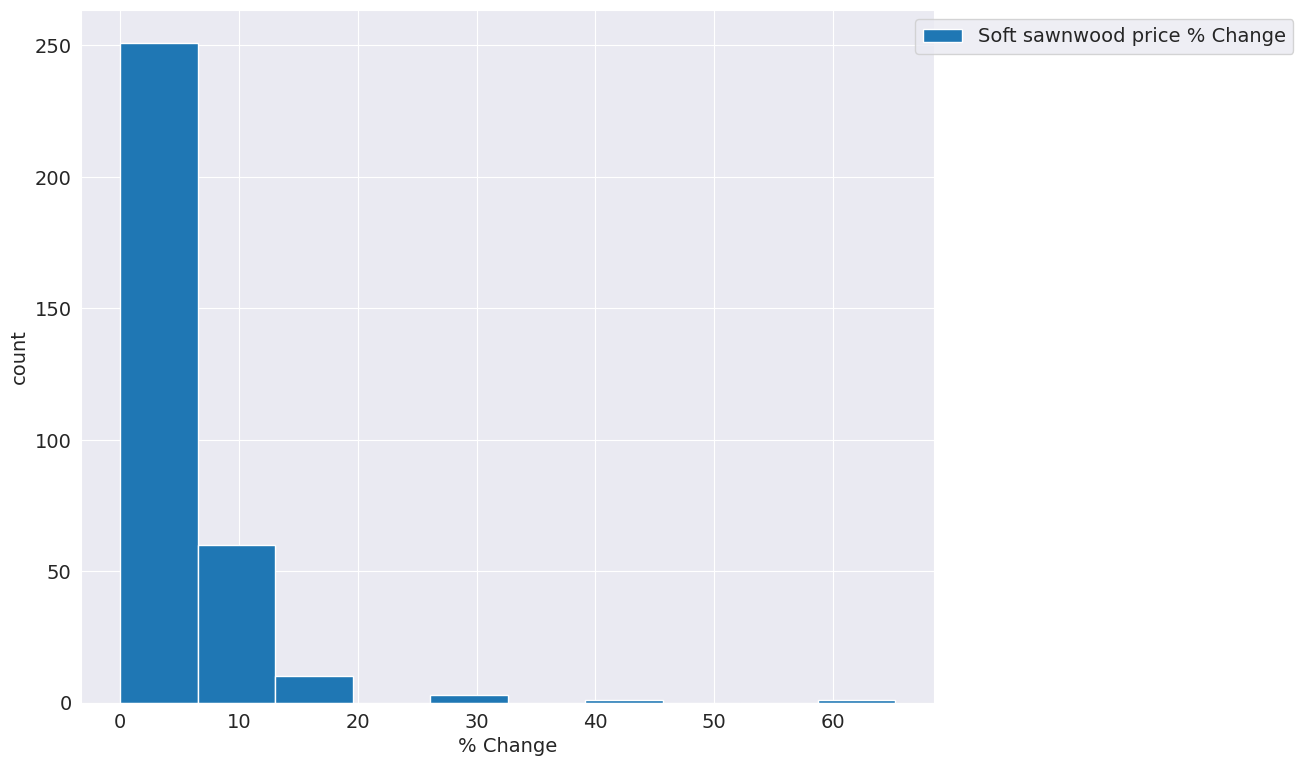

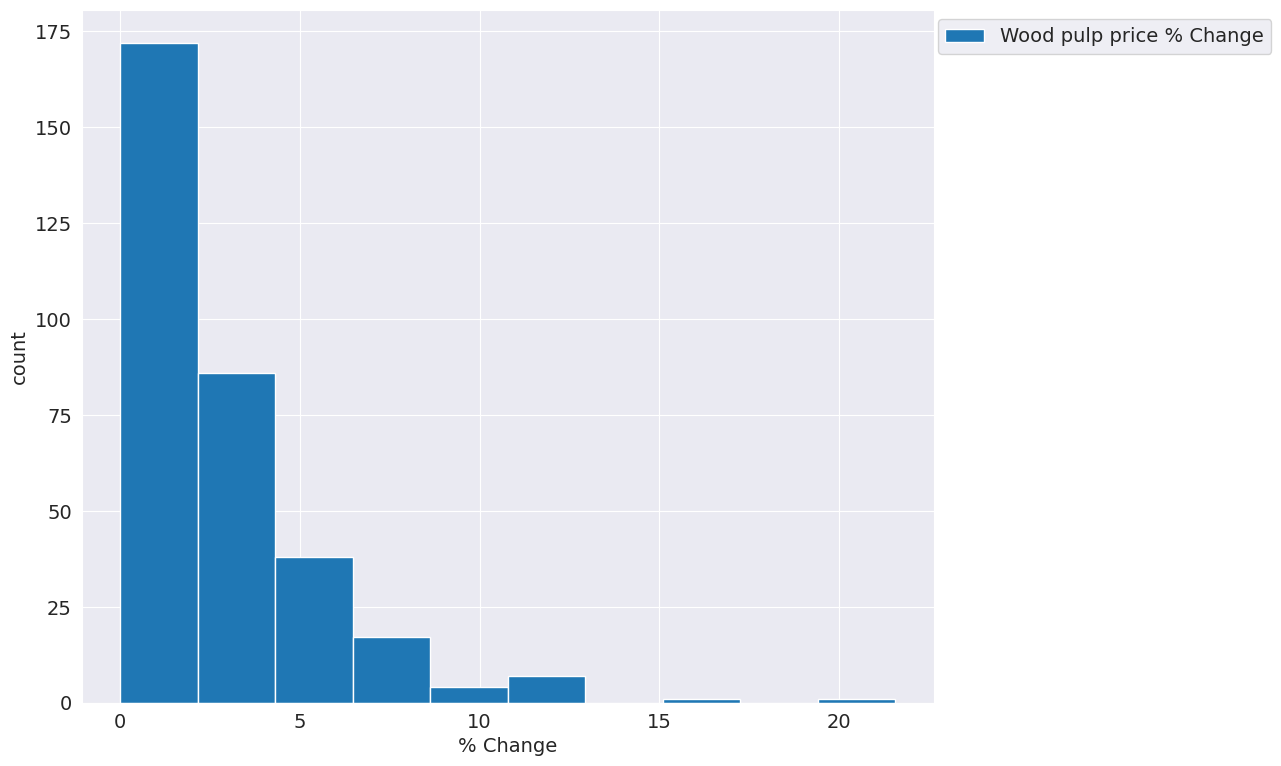

In [ ]:
changeList = ["Coarse wool price % Change", "Copra price % Change","Cotton price % Change","Fine wool price % Change","Hard log price % Change","Hard sawnwood price % Change","Hide price % change","Plywood price % Change","Rubber price % Change","Softlog price % Change","Soft sawnwood price % Change","Wood pulp price % Change"]

for i in range (len(changeList)):
  plt.figure(figsize=(12,12))
  df[changeList[i]].hist(figsize=(11,9), linewidth=1)
  plt.xlabel('% Change')
  plt.ylabel('count')
  plt.legend(changeList[i:], loc='upper center',bbox_to_anchor=(1.2,1))


Podemos observar que grande parte das matérias primas tem % de mudança frequente ideal inferior a 5%

## Descobrindo a matéria prima que tem o menor preço ao longo dos anos:




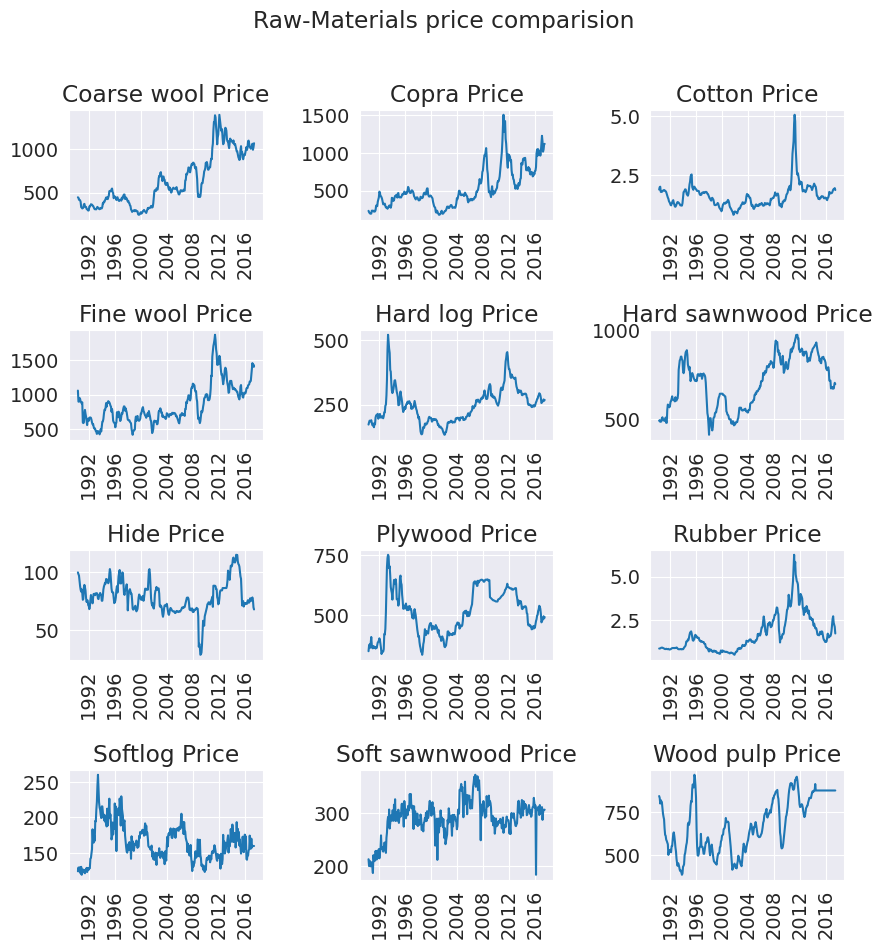

In [ ]:
plt.figure(figsize=(10,10))
materialList = raw_data
for i in range(len(materialList)):
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  plt.title(materialList[i])
  plt.plot(df[materialList[i]])
  plt.xticks(rotation=90)
  plt.suptitle("Raw-Materials price comparision")

Podemos observar que o ***Algodão*** e a ***Borracha*** são de preços mais baixos.
Comparando os preços:

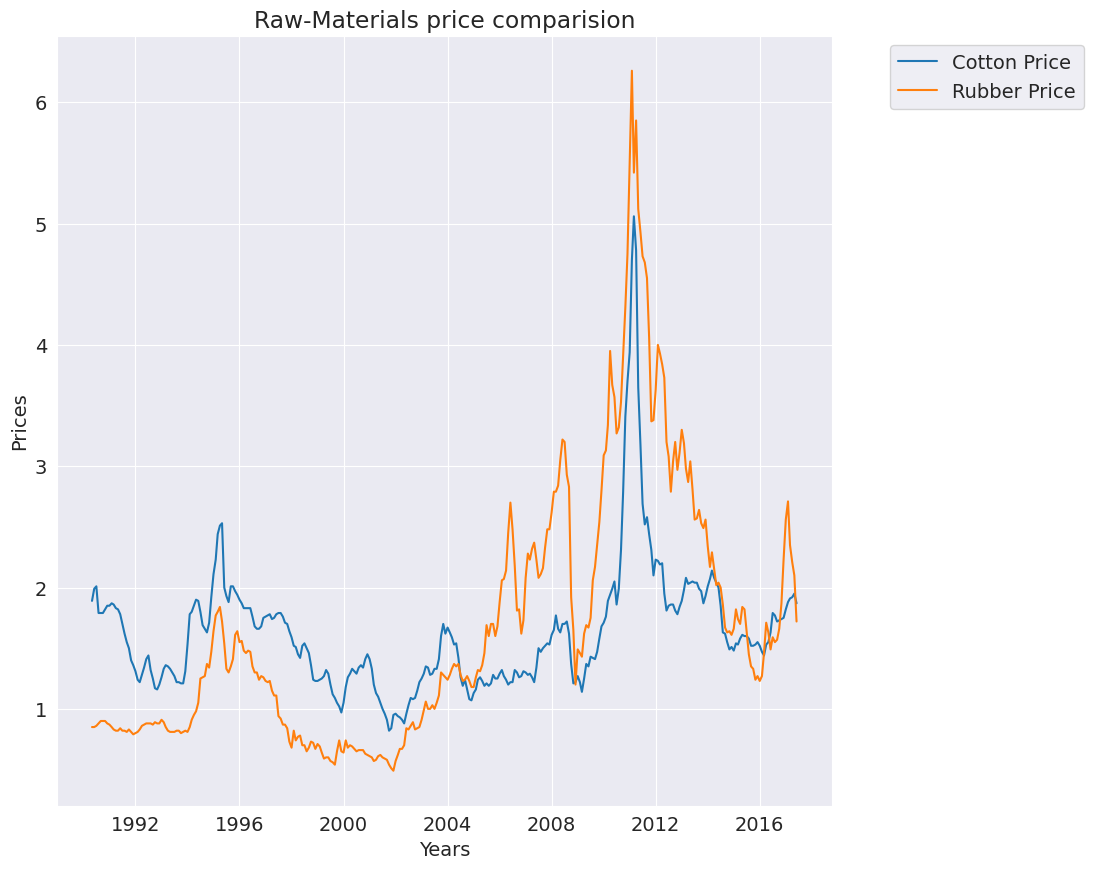

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel("Years")
plt.ylabel("Prices")
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2,1))

Podemos observar que o ***Algodão*** é a matéria prima de menor preço.

## Descobrindo a matéria prima de maior e menor variação de % de preço:

In [ ]:
import random as random

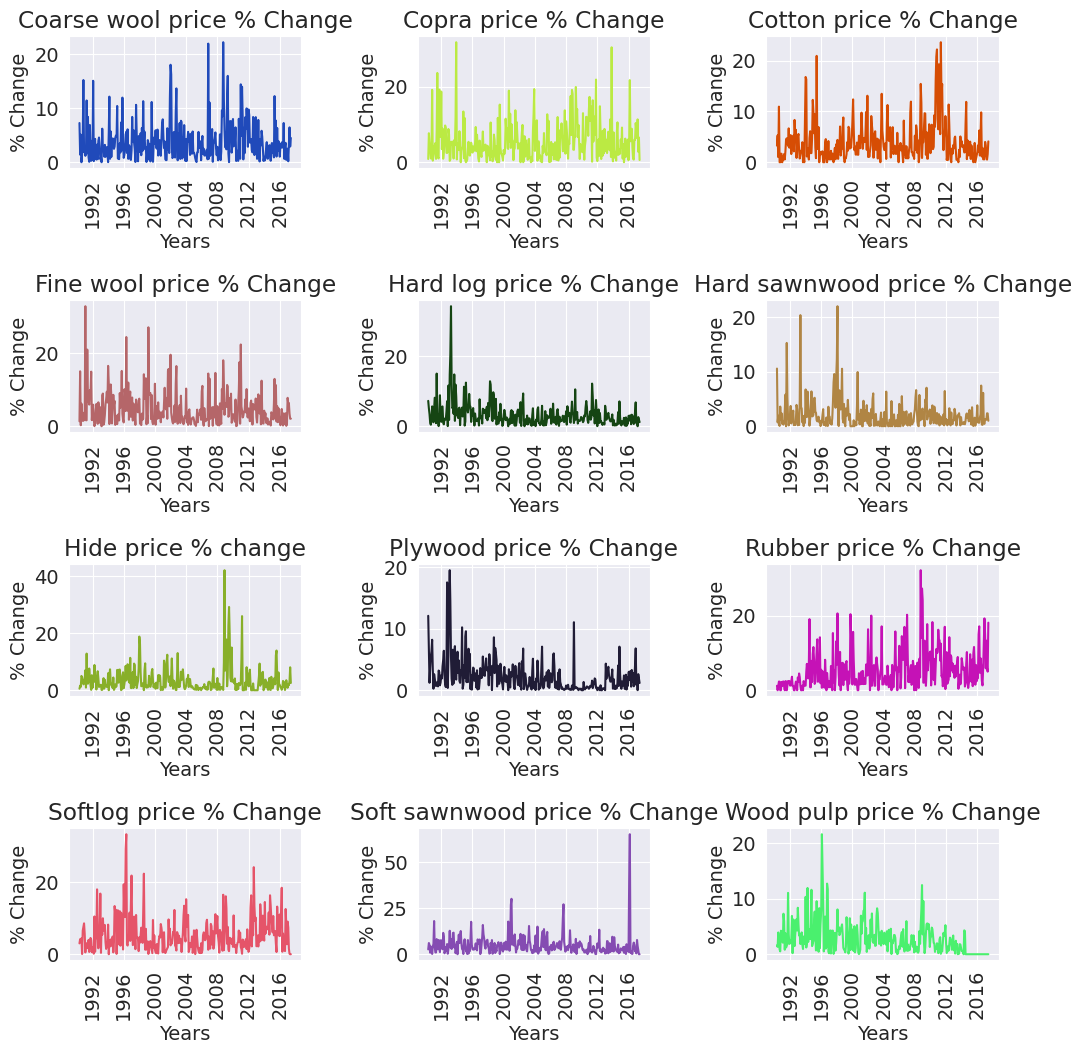

In [ ]:
plt.figure(figsize=(12,12))
for i in range(len(changeList)):

  r = random.random()
  b = random.random()
  g = random.random()
  color = (r,g,b)
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  plt.plot(df[changeList[i]], c=color)
  plt.xticks(rotation=90)
  plt.title(changeList[i])
  plt.xlabel("Years")
  plt.ylabel("% Change")


Podemos ver a maior % de variação de mudança em mais de 60 para madeira serrada macia e a menor % de mudança é para madeira compensada em menos de 20

## Descobrindo as matérias primas com mudanças drásticas de preço:

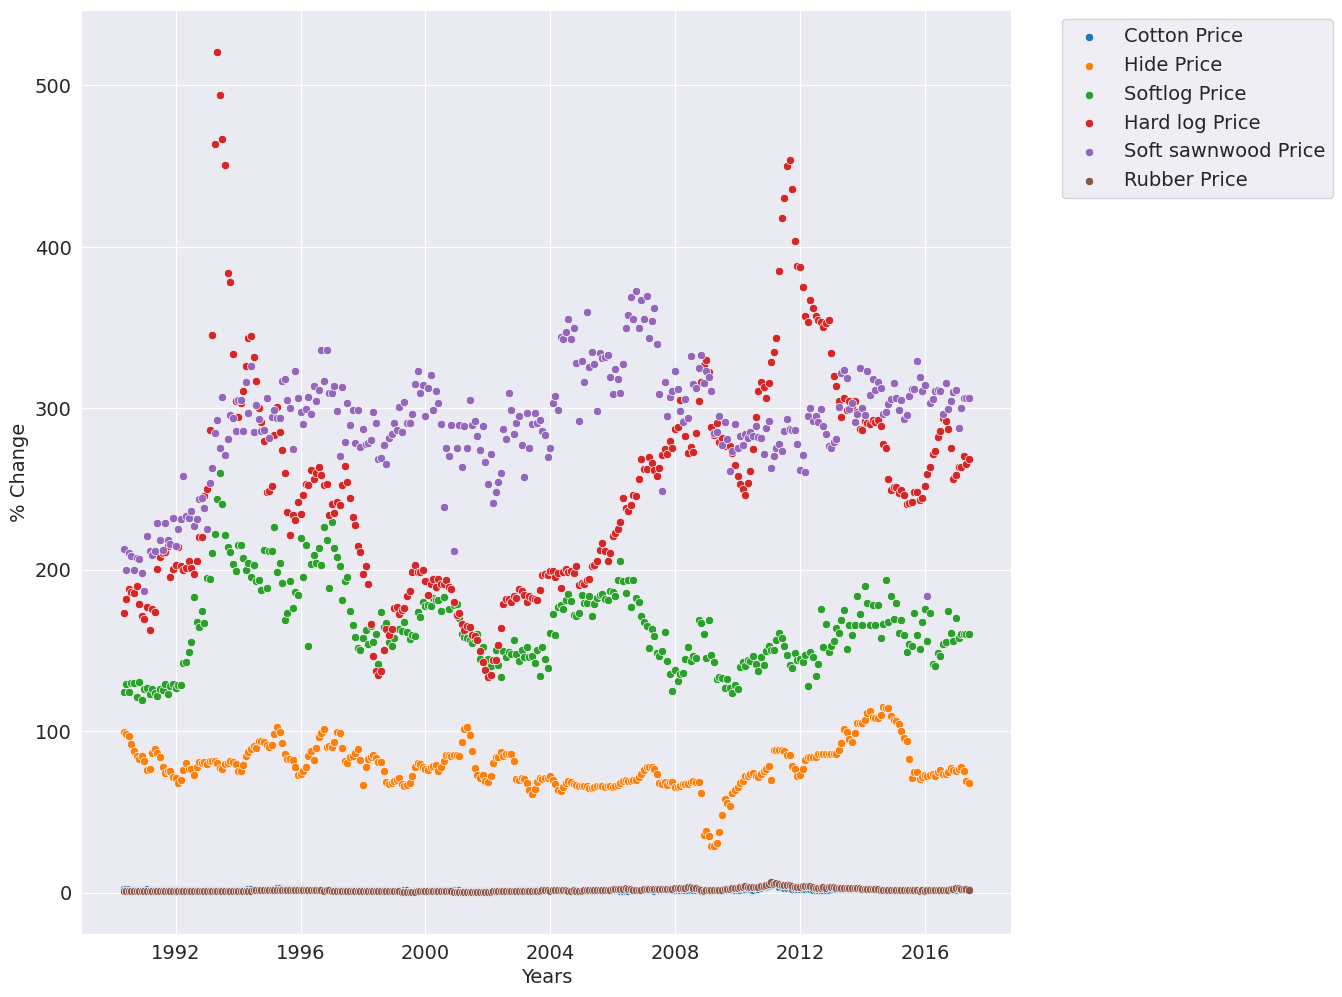

In [ ]:
lowList = ['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price', 'Rubber Price']
plt.figure(figsize=(12,12))
plt.xlabel("Years")
plt.ylabel("% Change")

for i in range(len(lowList)):
  sns.scatterplot(y=df[lowList[i]],x=df.index);
  plt.legend(lowList, loc='upper center', bbox_to_anchor=(1.2,1))

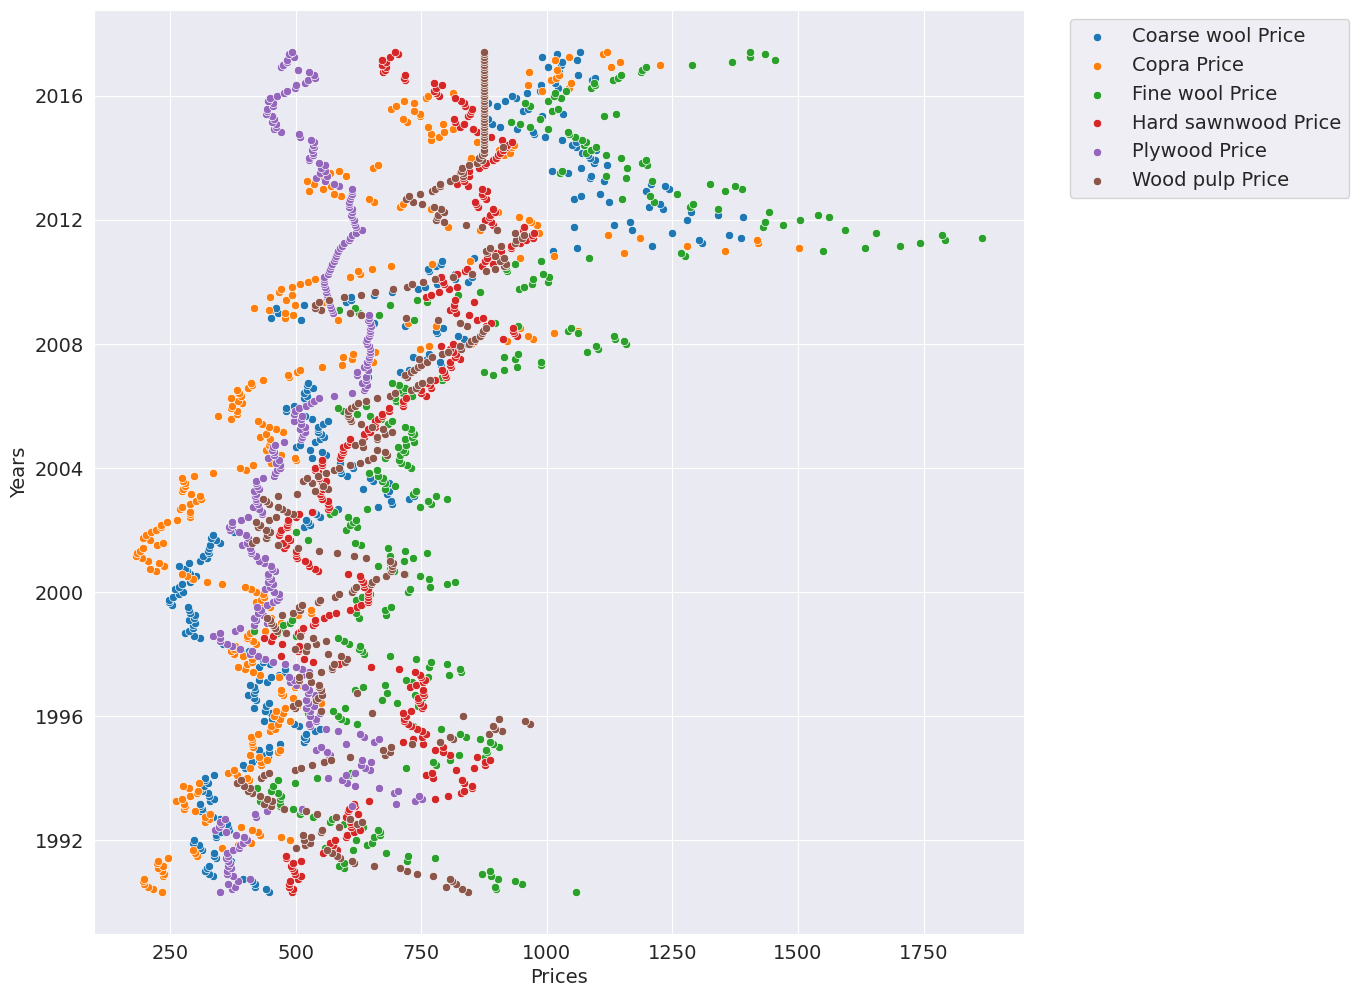

In [ ]:
highList = ['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price', 'Wood pulp Price']
plt.figure(figsize=(12,12))
plt.xlabel("Prices")
plt.ylabel("Years")

for i in range(len(highList)):
  sns.scatterplot(x=df[highList[i]],y=df.index);
  plt.legend(highList, loc='upper center', bbox_to_anchor=(1.2,1))

A mudança de preço é drástica para o preço de ***Hard log*** (tora dura) entre os materiais de baixa faixa de preço e entre os materias de de alto preço, são os preços de ***Fine wool*** (lã fina).

## Descobrindo a faixa de preço de matérias primas de baixo preço:

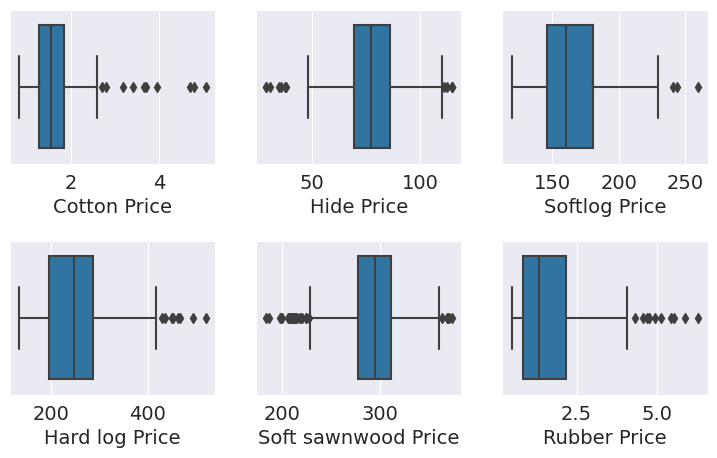

In [ ]:
lowList = ['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price', 'Rubber Price']
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[lowList[i]])

## Inferências e Conclusões

---


* Descobrimos as matérias primas de alta e baixa gama de acordo com seus preços
* Alta e baixa % de variação dos materiais
* Identificamos a variação de preços ao longo dos anos
* Correlação entre elas utilizando o mapa de calor